# Aprendizaje Supervisado con Scikit-Learn - Día 1

Antes que nada, vamos a comprobar las versiones de las diferentes librerías que vamos a estar utilizando a lo largo de las clases:

In [1]:
import sys
print("Python version:", sys.version)

import pandas as pd
print("pandas version:", pd.__version__)

import matplotlib
print("matplotlib version:", matplotlib.__version__)

import numpy as np
print("NumPy version:", np.__version__)

import scipy as sp
print("SciPy version:", sp.__version__)

import IPython
print("IPython version:", IPython.__version__)

import sklearn
print("scikit-learn version:", sklearn.__version__)

import mglearn

Python version: 3.7.6 | packaged by conda-forge | (default, Jan  7 2020, 22:33:48) 
[GCC 7.3.0]
pandas version: 0.25.3
matplotlib version: 3.1.2
NumPy version: 1.17.3
SciPy version: 1.3.1
IPython version: 7.10.1
scikit-learn version: 0.21.3


/home/dsc/anaconda3/envs/ks-sl/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


Por último, vamos a desactivar los mensajes de advertencia *`DeprecationWarnings`*, ya que no afectan en nada al código ni nuestros objetivos formativos para las clases:

In [2]:
# Importamos un filtro de warnings
from warnings import simplefilter
# Ignoramos los DeprecationWarnings, en concreto el del módulo six.py
simplefilter(action='ignore', category=DeprecationWarning)

In [3]:
# Hacemos ciertas configuraciones iniciales
%matplotlib inline
from preamble import *

## Lab 0 - Datasets de ejemplo

En esta clase se van a utilizar entre otros dos datasets de ejemplo. Los dos que se van a presentar a continuación pertenecen a la librería `mglearn`. Son:
- **Forge Dataset**. Que se utilizará para ejemplos de *clasificación supervisada*. Lo plotearemos con `mglearn.descrete_scatter` muy útil para presentar variables discretas ya agrupadas. Así, la X son las coordenadas de cada punto y la Y e su clasificación.
- **Dataset Wave**. Muy útil para regresión lineal.

### Clasificación supervisada - Forge Dataset

Text(0, 0.5, 'característica 2')

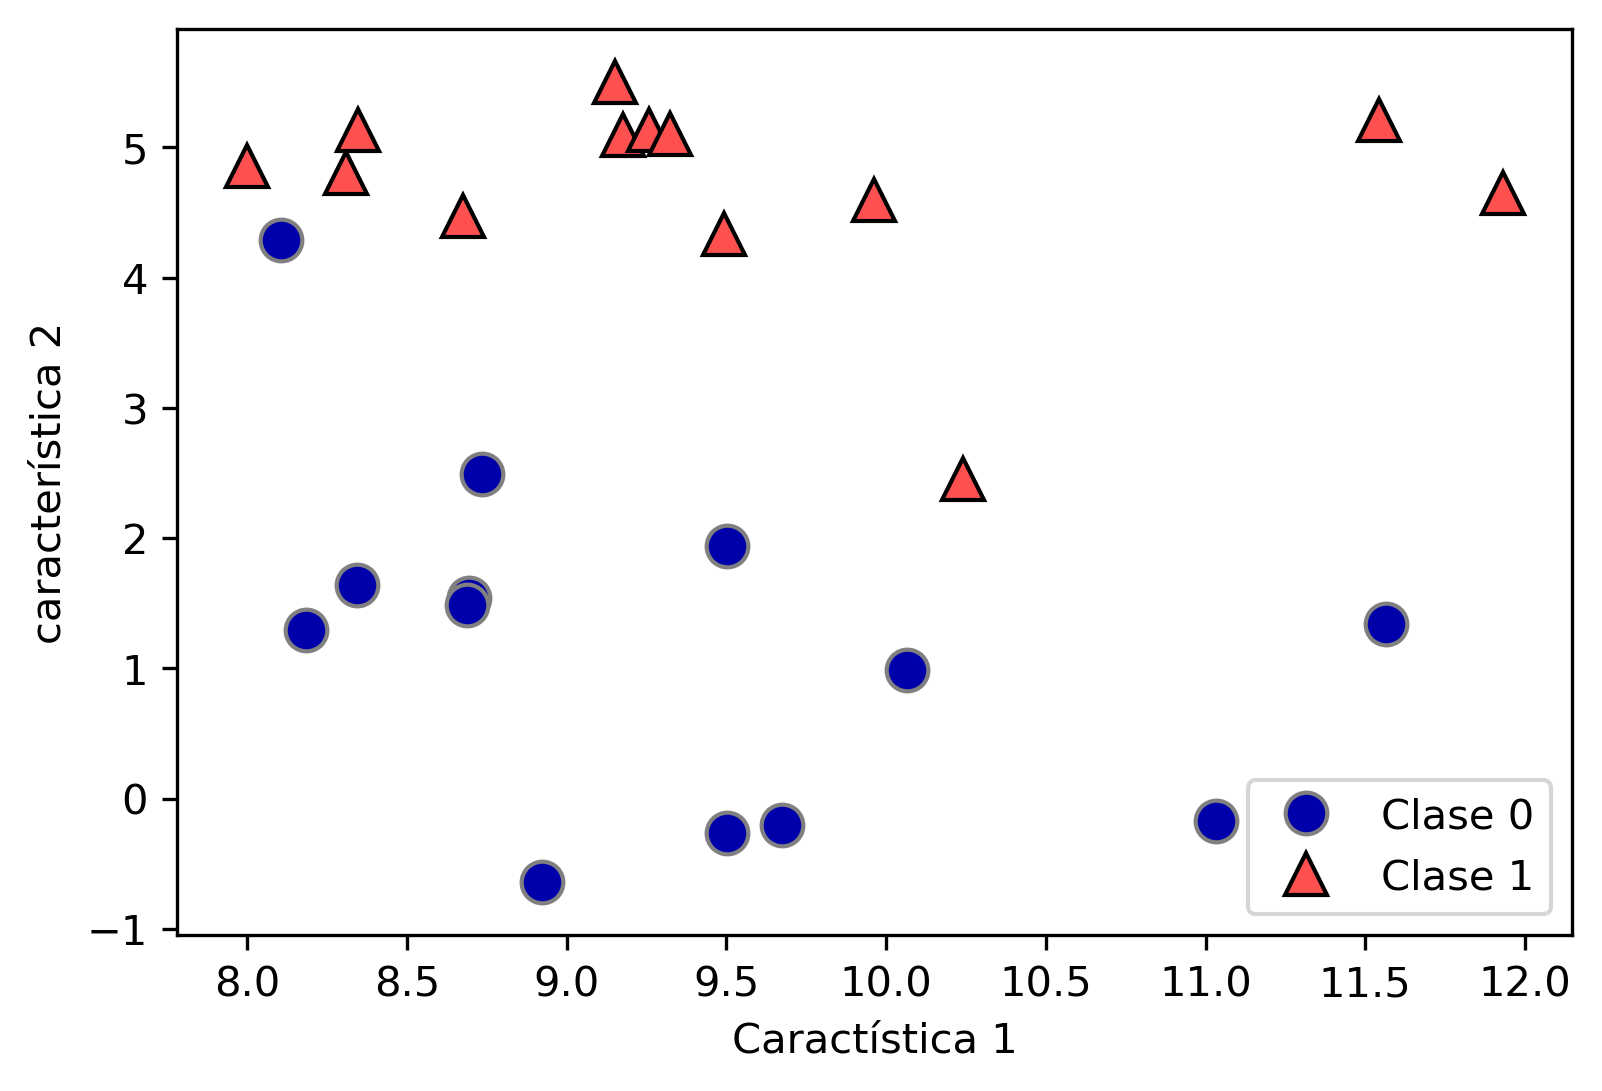

In [4]:
# Cargamos el dataset con las variables X, y
X, y = mglearn.datasets.make_forge()
# Lo pintamos: X son las coordenadas de cada elemento, y son las etiquetas de clasificación (0,1: variable discreta)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Clase 0", "Clase 1"], loc=4)
plt.xlabel("Caractística 1")
plt.ylabel("característica 2")

- Vemos el tipo de los elementos del dataset

In [5]:
print(f"The type of X is: {type(X)} and the type of y is {type(y)}")

The type of X is: <class 'numpy.ndarray'> and the type of y is <class 'numpy.ndarray'>


- Obtenemos el número de datos que tiene el dataset

In [6]:
# Escribe la línea de código abajo
print("X.shape:", X.shape[0])

X.shape: 26


#### Regresión supervisada - Dataset Wave

Utilizaremos otro dataset llamado *Wave* para los ejemplos básicos de regresión supervisada. Igualmente, utilizamos un dataset muy sencillo, de pocas dimensiones que nos ayude a visualizar y a desarrollar una intuición sobre nuestros modelos.

Text(0, 0.5, 'Objetivo')

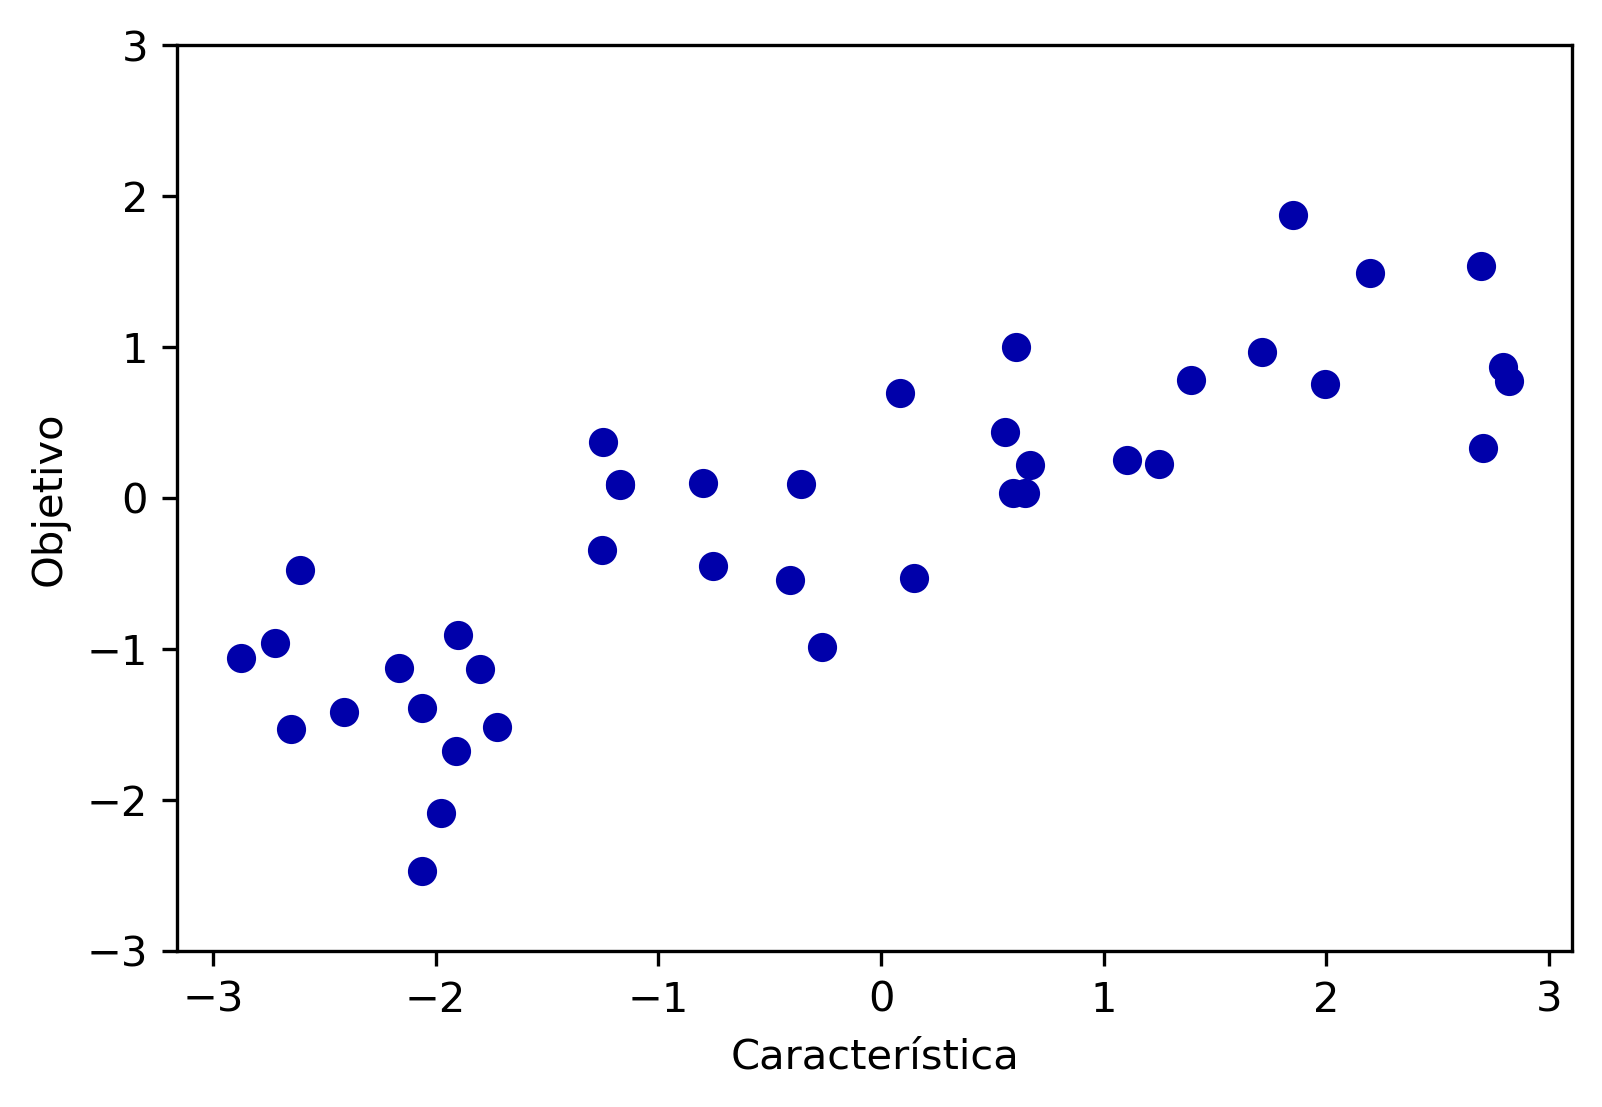

In [7]:
# Generamos un dataset
X, y = mglearn.datasets.make_wave(n_samples=40) #Inputs, Outputs
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Característica")
plt.ylabel("Objetivo")

### Otros datasets: sklearn

Scikit-Learn incluye un paquete llamado `sklearn.datasets` que embebe algunos datasets de aprendizaje de Machine Learning. Éstos se devuelven en un tipo `Bunch`, que no es más que un objeto tipo diccionario, pero con el añadido qde que se puede acceder a sus valores mediante la *dos notation*, donde los atributos interesantes son:

 - `data`: los datos para aprendizaje
 - `target`: las etiquetas de clasificación
 - `target_names`: los significados de las etiquetas
 - `feature_names`: la descripción de las características
 - `DESCR`: la descripción completa del dataset

Dos de los datasets embebidos de ejemplo que incluye Scikit-Learn y que usamos en clase se pueden cargar con los utilidades de carga de datasets `load_boston` y `load_breast_cancer`. Éstas utilidades son las que devuelven un objeto tipo bunch cuando son utilizadas, y con los atributos antes mencionados, la gestión de los datos del dataset es sencilla.

Si no obstante se prefieren utilizar dataframes de Pandas para la gestión de los diferentes datos del dataset, podemos hacer una conversión aprovechando dichos atributos y manejando debidamente el formato en el que debe crearse un DataFrame en Pandas, como se verá más adelante

In [8]:
help(sklearn.datasets)

Help on package sklearn.datasets in sklearn:

NAME
    sklearn.datasets

DESCRIPTION
    The :mod:`sklearn.datasets` module includes utilities to load datasets,
    including methods to load and fetch popular reference datasets. It also
    features some artificial data generators.

PACKAGE CONTENTS
    _svmlight_format
    base
    california_housing
    covtype
    kddcup99
    lfw
    mldata
    olivetti_faces
    openml
    rcv1
    samples_generator
    setup
    species_distributions
    svmlight_format
    tests (package)
    twenty_newsgroups

FUNCTIONS
    clear_data_home(data_home=None)
        Delete all the content of the data home cache.
        
        Parameters
        ----------
        data_home : str | None
            The path to scikit-learn data dir.
    
    dump_svmlight_file(X, y, f, zero_based=True, comment=None, query_id=None, multilabel=False)
        Dump the dataset in svmlight / libsvm file format.
        
        This format is a text-based format, wit

- Usando `keys` se puede ver qué podemos hacer con ellos:

In [9]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


- Mediante `DESCR` podemos acceder a su descripción.

In [10]:
print(load_breast_cancer()["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

- Con `filename` podemos acceder a su ubicación:

In [11]:
print(load_breast_cancer()["filename"])

/home/dsc/anaconda3/envs/ks-sl/lib/python3.7/site-packages/sklearn/datasets/data/breast_cancer.csv


- Como se ha comentado, son de tipu `bunch`. Eso implica que no aceptan métodos ni tienen atributos propios de los datasets de Pandas, aunque como se verá debajo pueden transformarse.

In [12]:
type(cancer)

sklearn.utils.Bunch

- Mediante `data` podemos acceder al conjunto de datos, que son de tipo `np.array`, así que tienen los métodos y atributos de los `arrays`.

In [13]:
cancer_data = cancer.data
type(cancer_data)

numpy.ndarray

In [14]:
print("Dimensiones del dataset:", cancer.data.shape)

Dimensiones del dataset: (569, 30)


- Cada tumor está etiquetado como *benigno* o *maligno*, y el objetivo será aprender a predecir en base a ciertas características del tejido si un tumor es benigno o maligno.
- Mediante `target_names` podemos acceder a sus etiquetas y mediante `target` podemos acceder al valor que toman sus etiquetas.

In [15]:
print("Conteo de muestras por clase:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

Conteo de muestras por clase:
 {'malignant': 212, 'benign': 357}


- Podemos acceder a sus variables mediante `feature_names`

In [16]:
print("Nombres de las características:\n", cancer.feature_names)

Nombres de las características:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


- Y finalmente, podemos usar todas ellas para constuir un dataset de estilo pandas, que nos ayudaría para realizar un examen exploratorio

In [17]:
cancer_df = pd.DataFrame(np.column_stack((cancer.data, cancer.target)),columns = np.append(cancer.feature_names,['TARGET']))
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,...,worst concave points,worst symmetry,worst fractal dimension,TARGET
0,17.99,10.38,122.80,1001.0,...,0.27,0.46,0.12,0.0
1,20.57,17.77,132.90,1326.0,...,0.19,0.28,0.09,0.0
2,19.69,21.25,130.00,1203.0,...,0.24,0.36,0.09,0.0
3,11.42,20.38,77.58,386.1,...,0.26,0.66,0.17,0.0
4,20.29,14.34,135.10,1297.0,...,0.16,0.24,0.08,0.0


In [18]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,...,worst concave points,worst symmetry,worst fractal dimension,TARGET
count,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00
mean,14.13,19.29,91.97,654.89,...,0.11,0.29,0.08,0.63
std,3.52,4.30,24.30,351.91,...,0.07,0.06,0.02,0.48
min,6.98,9.71,43.79,143.50,...,0.00,0.16,0.06,0.00
25%,11.70,16.17,75.17,420.30,...,0.06,0.25,0.07,0.00
50%,13.37,18.84,86.24,551.10,...,0.10,0.28,0.08,1.00
75%,15.78,21.80,104.10,782.70,...,0.16,0.32,0.09,1.00
max,28.11,39.28,188.50,2501.00,...,0.29,0.66,0.21,1.00


### Otro ejemplo real: Boston Housing Dataset
El objetivo de este dataset es predecir el valor medio de las casas en varios barrios de Boston en la década de los '70 usando información como la tasa de criminalidad, proximidad al río Charles, acceso a autovías, etc.

In [19]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape:", boston.data.shape)

Data shape: (506, 13)


In [20]:
boston.data

array([[  0.006,  18.   ,   2.31 , ...,  15.3  , 396.9  ,   4.98 ],
       [  0.027,   0.   ,   7.07 , ...,  17.8  , 396.9  ,   9.14 ],
       [  0.027,   0.   ,   7.07 , ...,  17.8  , 392.83 ,   4.03 ],
       ...,
       [  0.061,   0.   ,  11.93 , ...,  21.   , 396.9  ,   5.64 ],
       [  0.11 ,   0.   ,  11.93 , ...,  21.   , 393.45 ,   6.48 ],
       [  0.047,   0.   ,  11.93 , ...,  21.   , 396.9  ,   7.88 ]])

In [21]:
boston.data.shape

(506, 13)

A efectos de utilizar este dataset, es mejor complementarlo considerando no sólo las 13 características iniciales, sino todos los productos entre características (llamados también *interacciones*). La generación de interacciones la haremos incrementando el grado polinómico del dataset con el transformador de Scikit Learn [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) Además, modificaremos la escala de los datos para uniformizarla y poder utilizar el concepto de medida de los datos correctamente gracias al preprocesador [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) de Scikit-Learn.

In [22]:
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
# Definimos una función en Python para encapsular la ingeniería de características que vamos a realizar sobre el dataset

def load_extended_boston():
    boston = load_boston()
    X = boston.data
    # Aplicamos un MinMaxScaler para escalar las características bajo un mismo criterio
    X = MinMaxScaler().fit_transform(boston.data)
    # Finalmente, generamos interacciones entre las diferentes características.
    X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
    return X, boston.target

In [23]:
X, y = load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


- Como se puede ver, se ha pasado de 13 columnas o features a 104 feature debido a la polynomial conversion

## Lab 1 - k-Nearest Neighbors
### Clasificación k-NN

Usemos para empezar nuestro dataset *Forge*. Primero, separamos los datos en un set de training y de test para poder evaluar el rendimiento del modelo:

In [24]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

#Con 'train_test_split' dividimos una parte de train y otra de test, para poder evaluar el modelo
#Random_state es similar a una semilla, de tal manera que siempre seleccione la misma parte para comparar resultados con otra gente
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Lo siguiente es importar el modelo que vamos a realizar. En este caso es **K-vecinos**. Para hacer esta prueba, indicaremos de momento 3 vecinos.

In [25]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

Finalmente, entrenamos el modelo usando el juego de datos de entrenamiento. Esto implica almacenar el dataset para poder calcular los vecinos durante la predicción:

In [26]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [27]:
print("Predicciones sobre el juego de pruebas:", clf.predict(X_test))

Predicciones sobre el juego de pruebas: [1 0 1 0 1 0 0]


In [28]:
print("Precisión sobre el juego de pruebas: {:.2f}"
      .format(clf.score(X_test, y_test)))

Precisión sobre el juego de pruebas: 0.86


### Análisis de KNeighborsClassifier

Se puede ilustrar la predicción para todos los puntos en el plano $x,y$. Se usan colores en el plano de acuero con la clase predicha para el punto en cuestión. Eso permite ver la frontera de decisión y desarrollar una cierta intuición sobre el modelo en función del número de vecinos.

En el siguiente código, se generan gráficas para valores de vecinos de 1, 3 y 9:

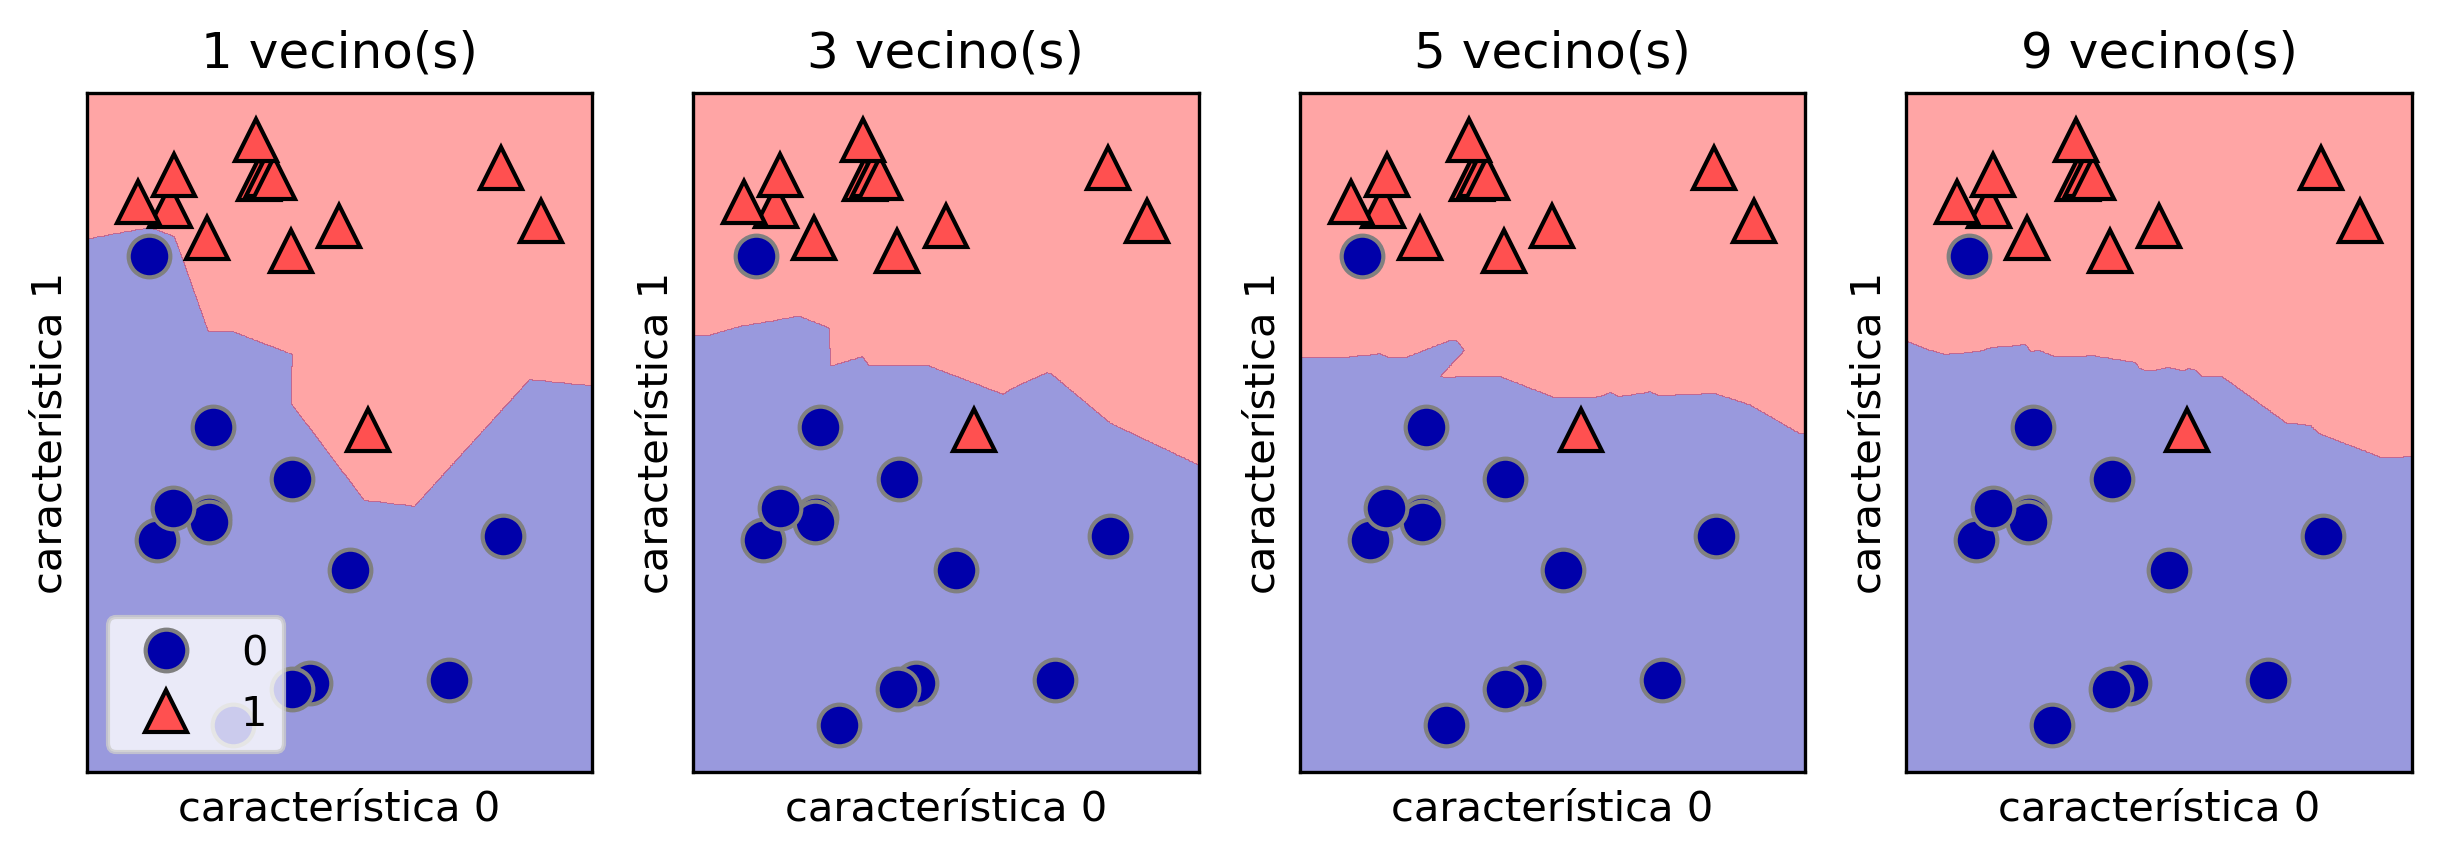

In [29]:
fig, axes = plt.subplots(1, 4, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 5, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(
        clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} vecino(s)".format(n_neighbors))
    ax.set_xlabel("característica 0")
    ax.set_ylabel("característica 1")
axes[0].legend(loc=3)

**Pregunta**: ¿qué diferencias observas en la frontera de clasificación y qué puede decirse del uso de varios vecinos frente al uso de uno sólo?

<font color='grey'>
Un sólo vecino hace que la frontera de decisión se ajuste mucho a los datos de entrenamiento. Si se incrementa el número de vecinos, la frontera se suaviza.
Esto implica que con un número bajo de vecinos, el modelo es más complejo, y con un número alto, menos. Yendo a un extremo, si $k=n$, donde n es el núermo de muestras del juego de entrenamiento, todos los puntos tendrían el mismo número de vecions y la predicción sería siempre la misma: la clase más frecuente en el juego de entrenamiento.

Vamos a evaluar ahora la conexión entre complejidad y generalización usando un dataset real (Breast Cancer Dataset):

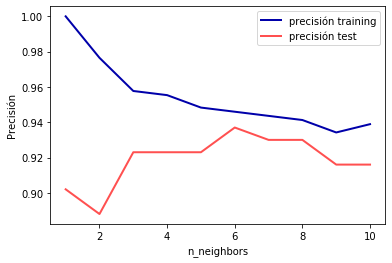

In [18]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target,
    stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# Probamos n_neighbors de 1 a 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # Construimos el modelo
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # Guardamos la precisión del training set
    training_accuracy.append(clf.score(X_train, y_train))
    # Guardamos la precisión de testing set (generalización)
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings,
         training_accuracy, label="precisión training")
plt.plot(neighbors_settings, test_accuracy, label="precisión test")
plt.ylabel("Precisión")
plt.xlabel("n_neighbors")
plt.legend()

¿Reconoces las características de las curvas  de complejidad frente a precisión que vimos al principio? (Nótese que por el eje de ordenadas, la curva correspondiente al training set está invertida)

**¿Qué numero de vecinos es el mejor para obtener el mejor rendimiento del modelo?**

<font color="red">
El número adecuado de vecinos es 6

### Regresión k-NN
También hay una variante de regresión de k-Nearest Neighbors. De nuevo, comparemos el uso de un solo vecino frente a tres para ver la variación de las predicciones:

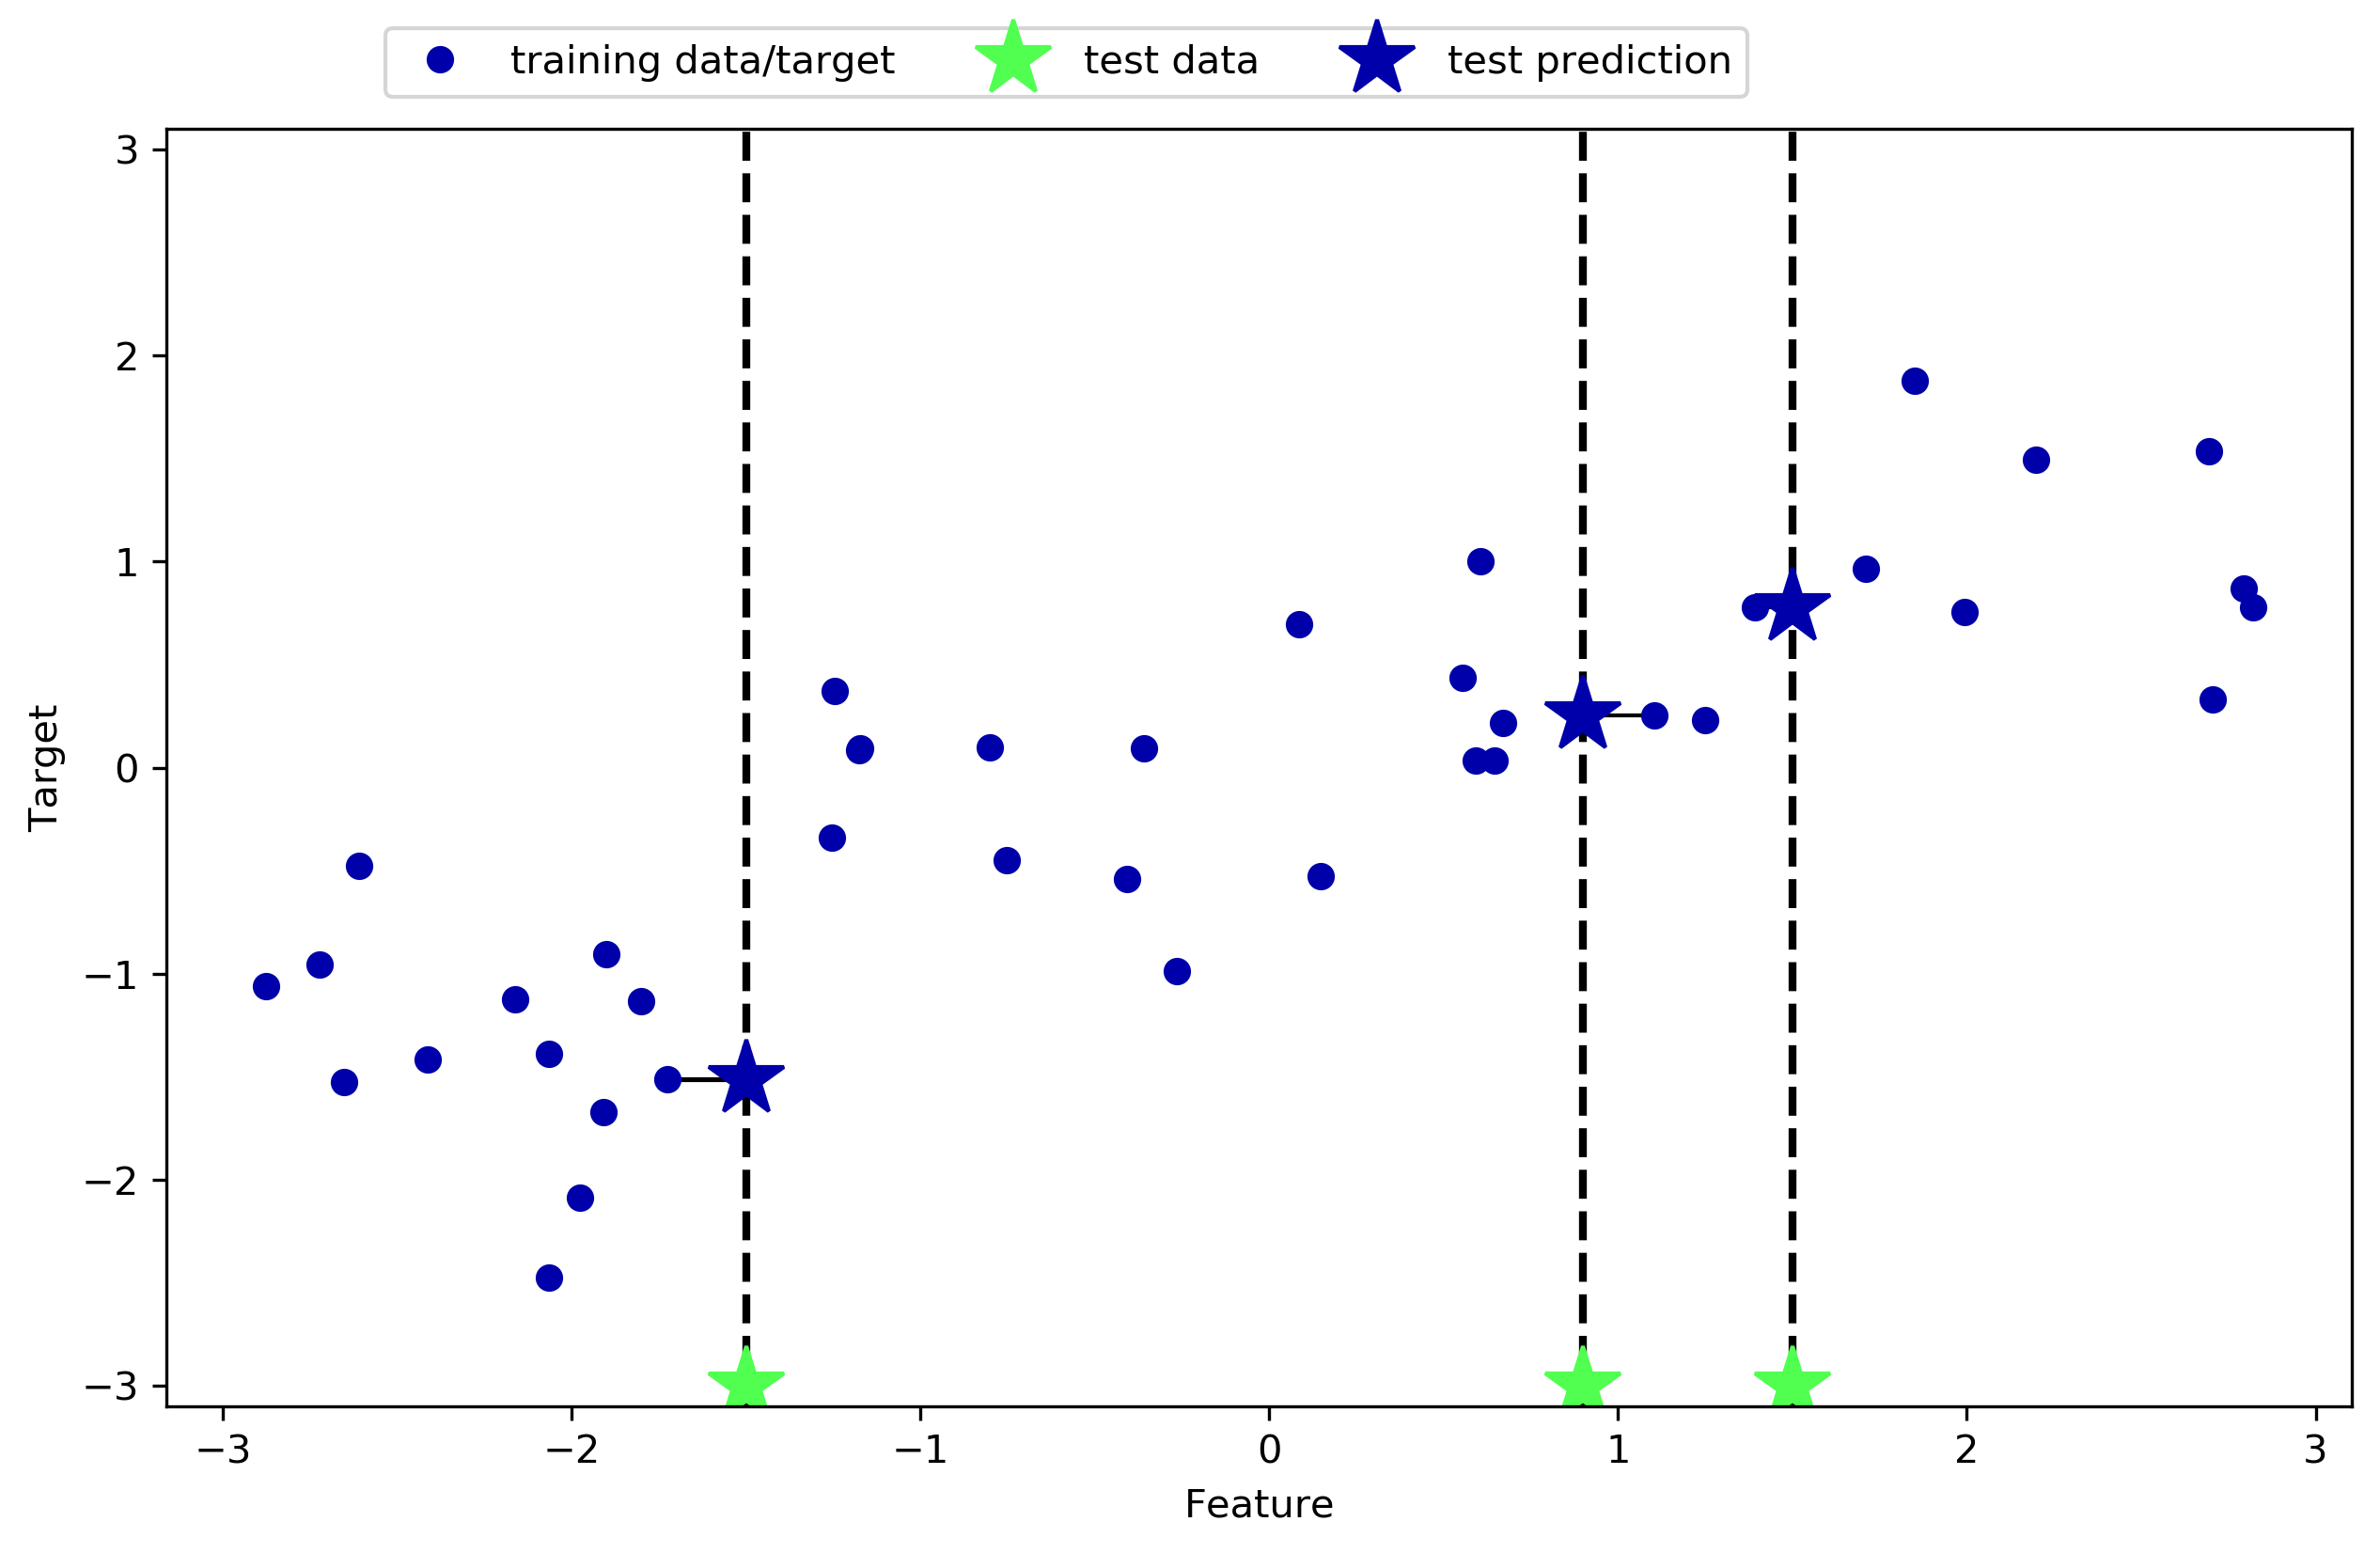

In [21]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

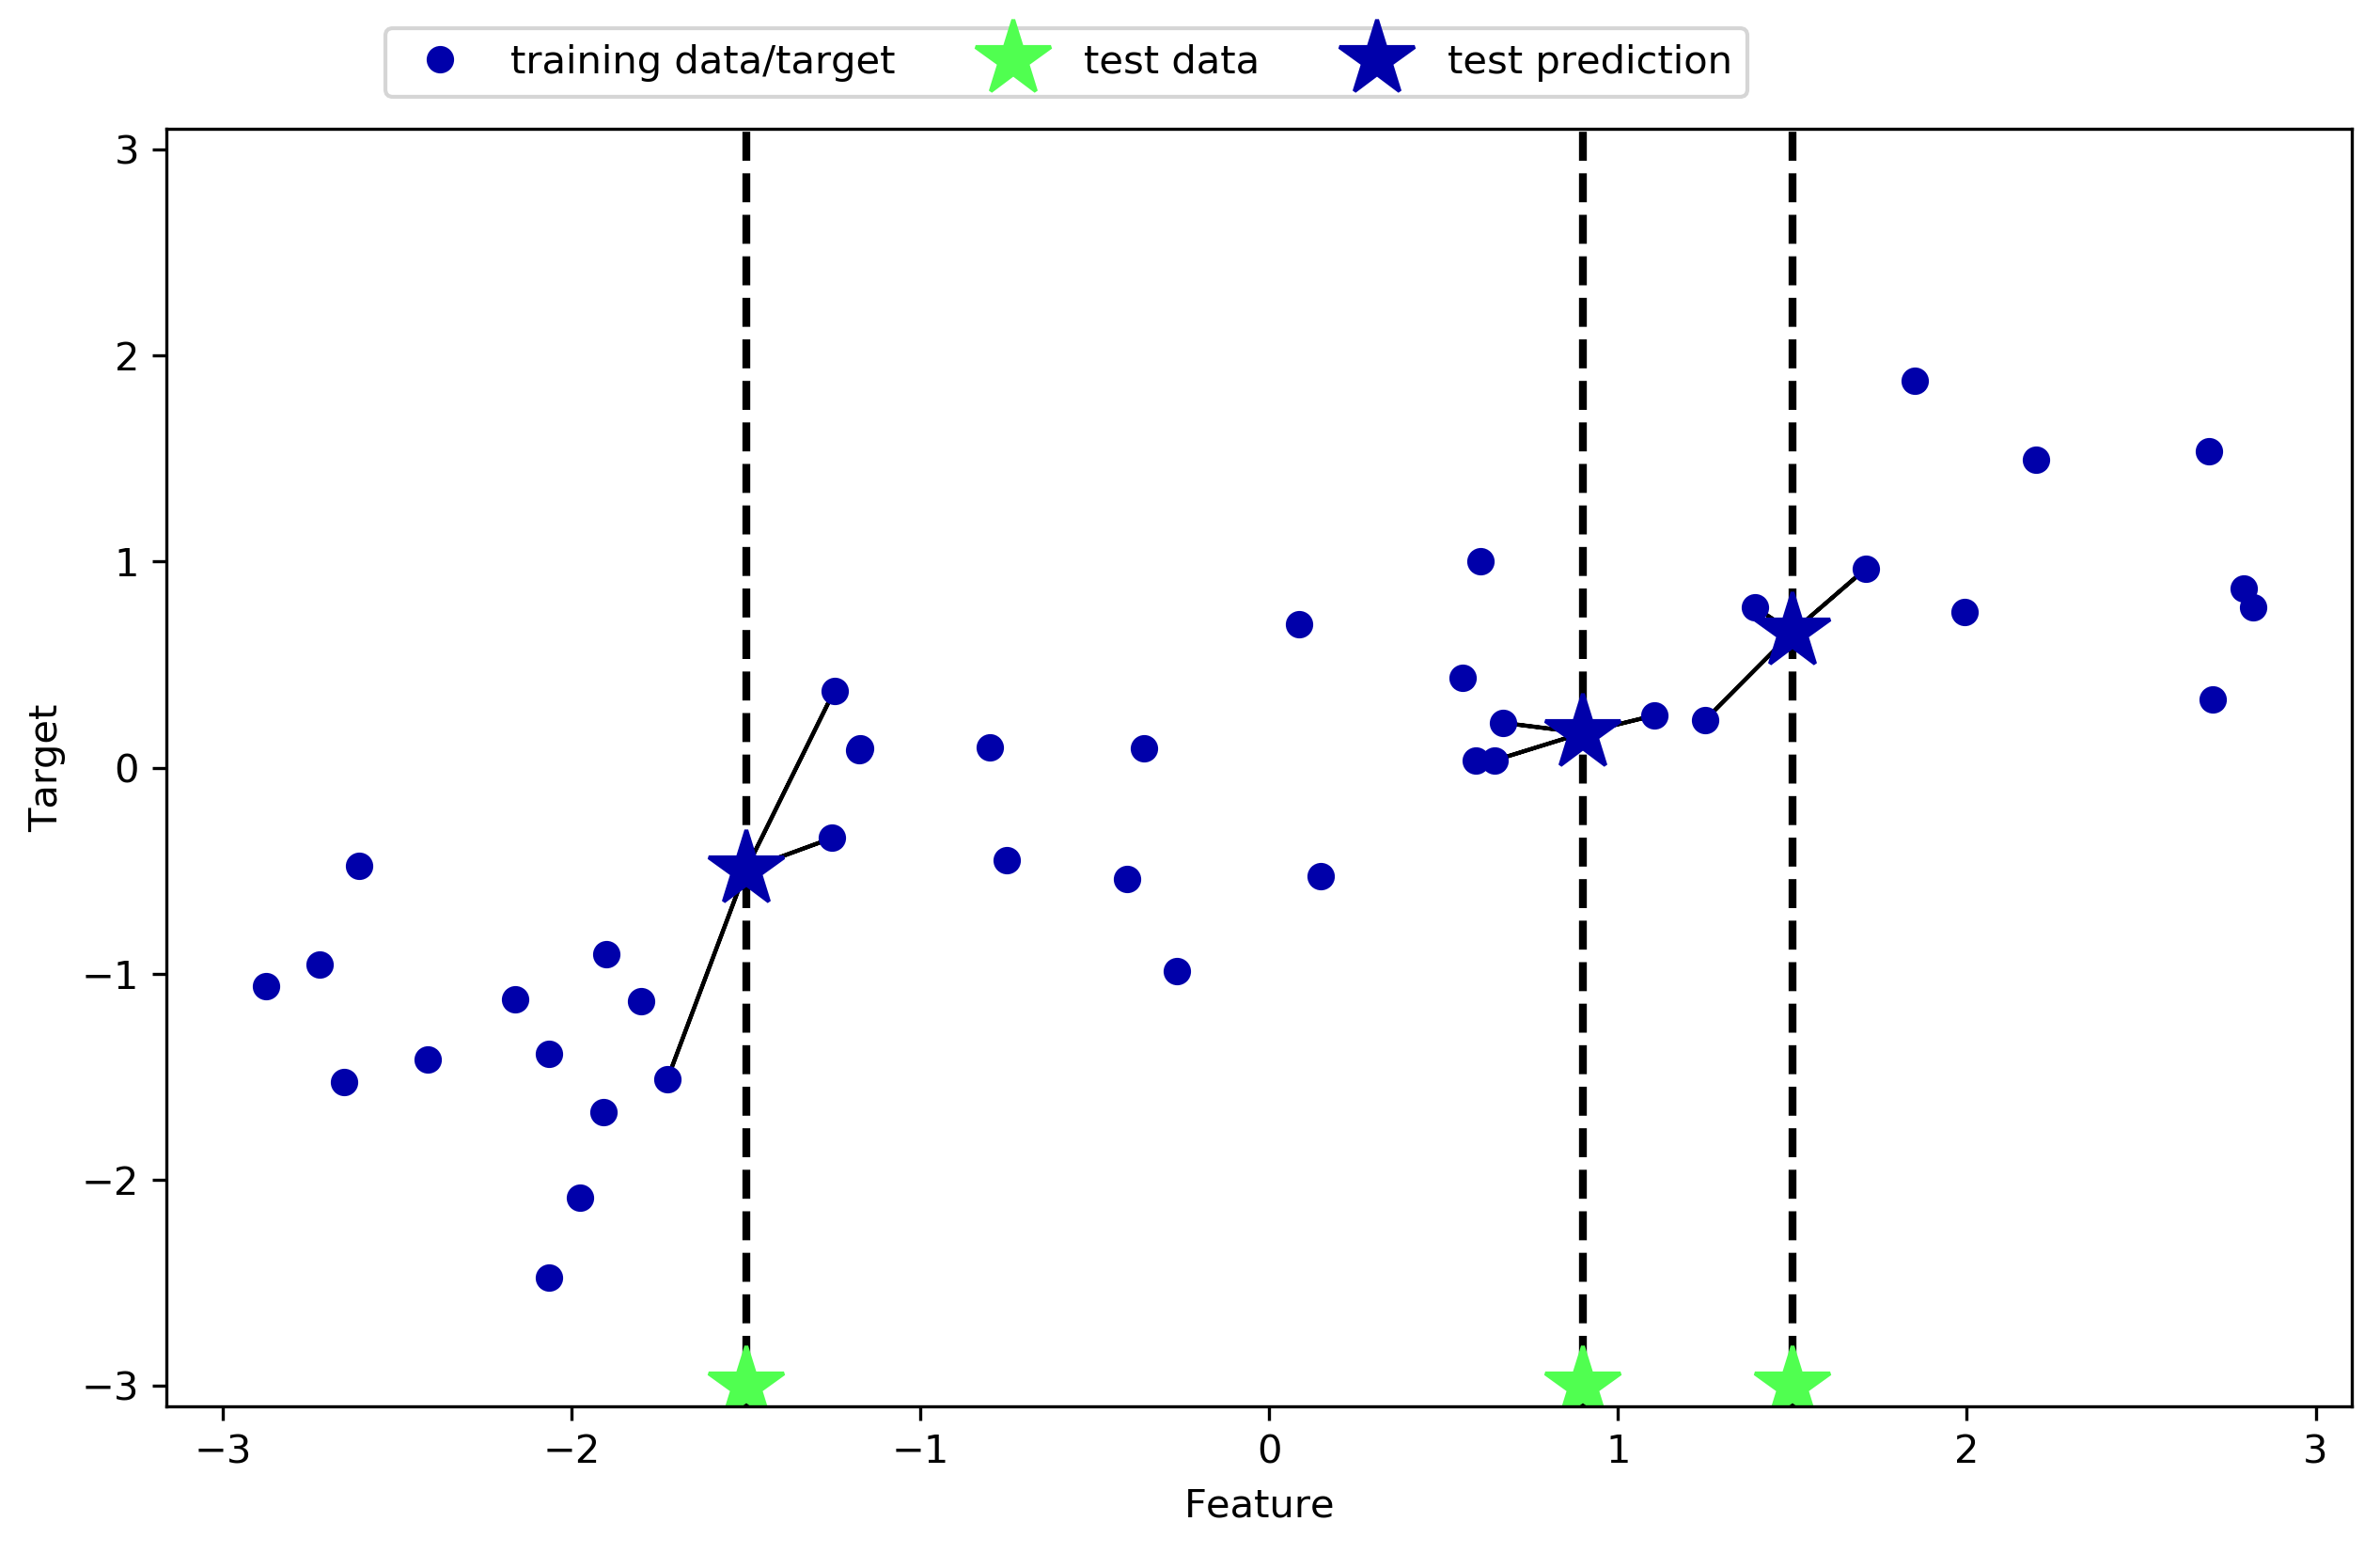

In [22]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

La implementación de kNN para regresión en Scikit-learn es muy parecida a su equivalente de clasificación. Lo hacemos aquí para el *Wave* dataset:

In [23]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# Partimos el dataset wave en training y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)

# Instanciamos el modelo y especificamos 3 vecinos
reg = KNeighborsRegressor(n_neighbors=3)
# Ajustamos el modelo usando los objetivo y datos de training
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [24]:
print("Predicciones sobre el test set:\n", reg.predict(X_test))

Predicciones sobre el test set:
 [-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


También podemos evaluar el modelo utilizando el método `score`, que para la regresión devuelve $R^2$ (el coeficiente de determinación, una medida de lo bueno que es un modelo de regresión que veremos en más detalle más adelante):

In [25]:
print("Coeficiente de determinación del test set: {:.2f}".format(reg.score(X_test, y_test)))

Coeficiente de determinación del test set: 0.83


### Análisis de KNeighborsRegressor

Para establecer el análisis, vamos a hacer una predicción de todos los posibles valores que puede tener la característica $x$ (donde $x\in[1,3000]$), y para ello creamos un dataset que tenga todos los puntos en una línea:

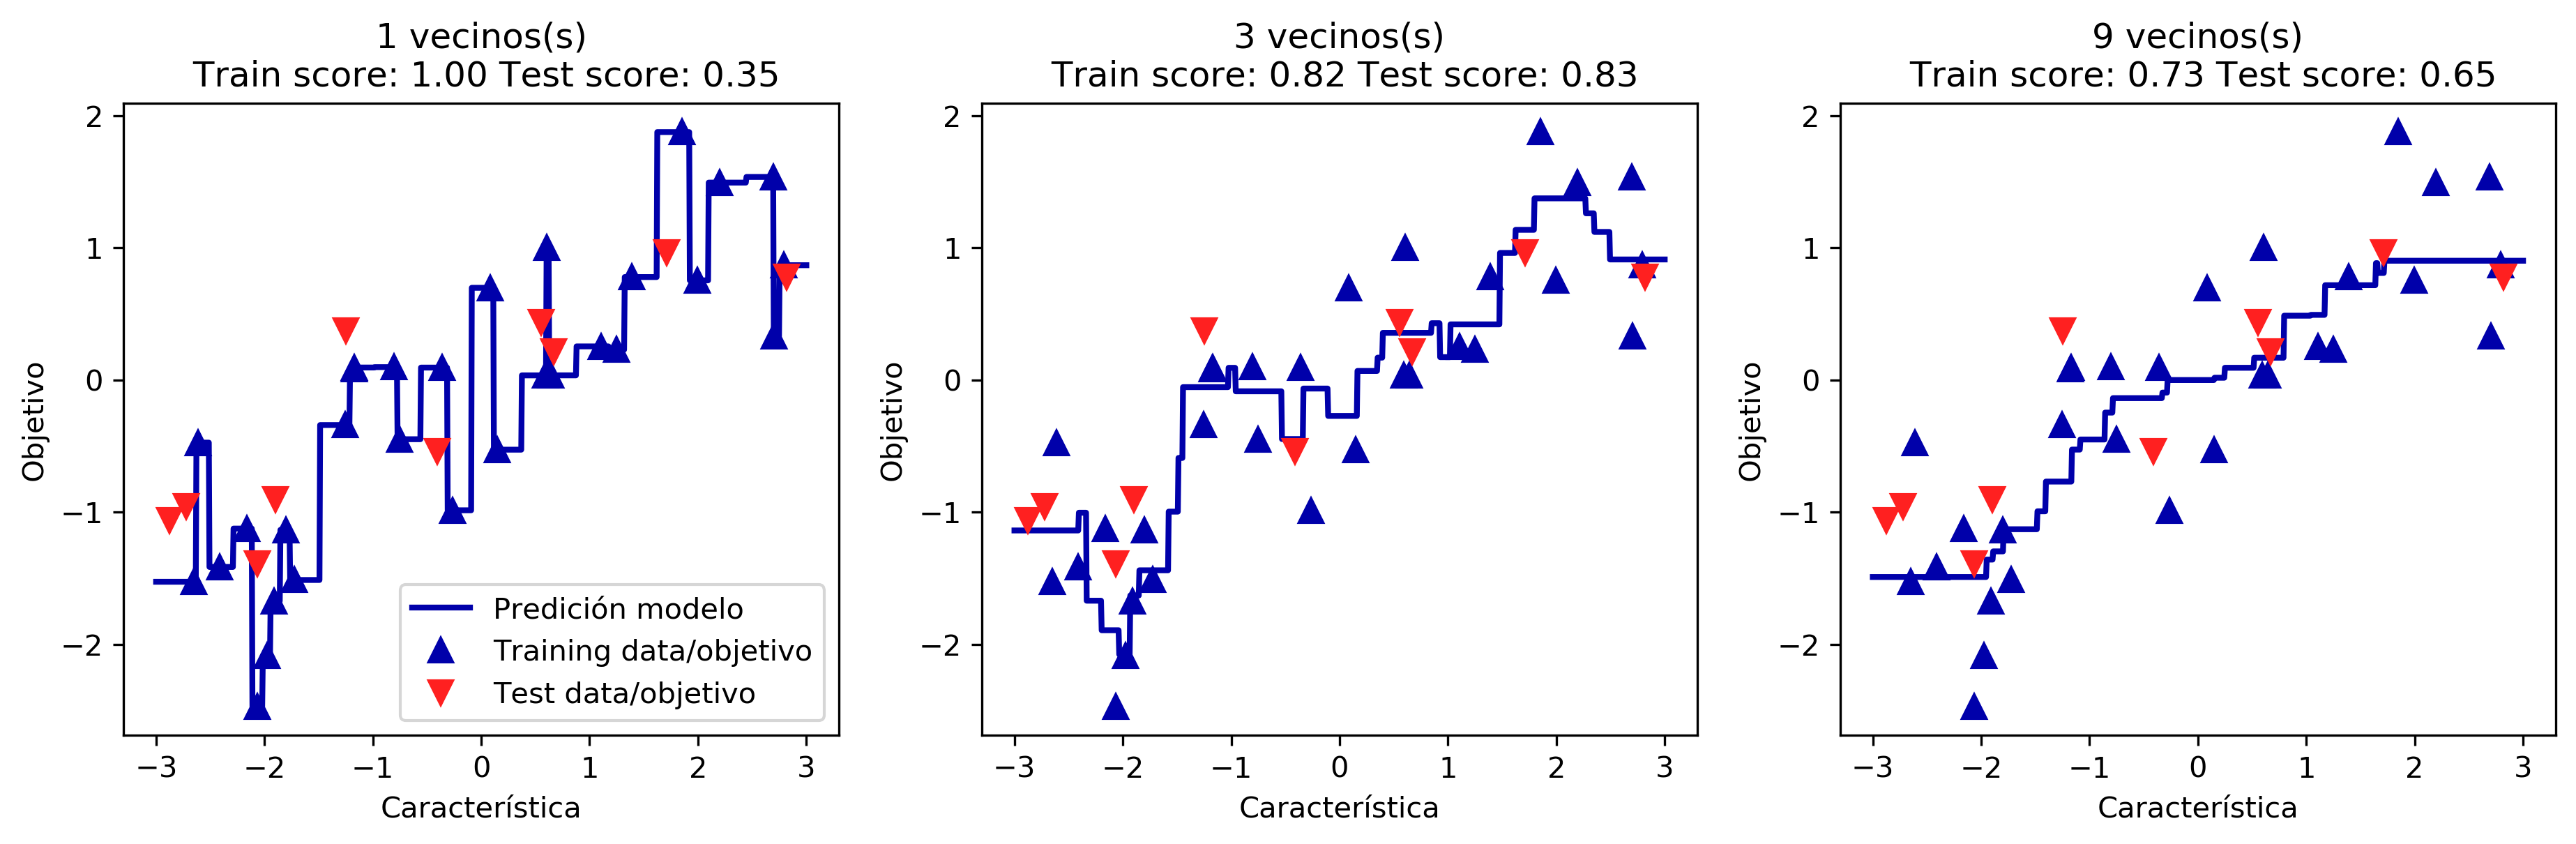

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# Crear 1,000 data points, igualmente espaciados entre -3 y 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} vecinos(s)\n Train score: {:.2f} Test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Característica")
    ax.set_ylabel("Objetivo")
axes[0].legend(["Predición modelo", "Training data/objetivo",
                "Test data/objetivo"], loc="best")

Como ejercicio adicional con kNNs, ábrase el fichero [kNNs-Exercise.ipynb](kNNs-Exercise.ipynb)